In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import datetime
from scipy import stats
import seaborn as sns

In [56]:

data = pd.read_csv("dog_rates_tweets.csv", parse_dates= ['created_at'])


In [57]:
def to_timestamp(data): #2018-05-03 18:29:35 example format
    
    ret = data.timestamp()
    return ret



In [58]:
data['timestamp'] = data['created_at'].apply(to_timestamp)

In [59]:
def matching(data):
    result = re.search(r'(\d+(\.\d+)?)/10', data)

    if result:
        ret = float(result.group(1))
        if(ret > 25):
            return float("nan")
        else:
            return ret

 
data['score'] = data['text'].apply(matching)
data["NotNa"] = data['score'].notna()
data = data.dropna()


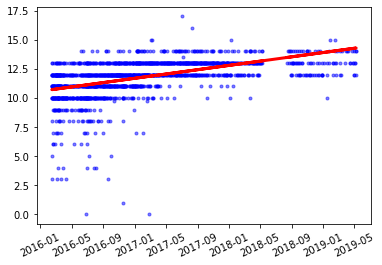

In [60]:
result = stats.linregress(data['timestamp'], data['score'])
sns.set()
plt.figure(facecolor='white')
plt.xticks(rotation=25)
plt.plot(data['created_at'], data['score'], 'b.', alpha=0.5)
plt.plot(data['created_at'], data['timestamp']*result.slope + result.intercept, 'r-', linewidth=3)
plt.savefig('dog-rates-result.png')